Generate Test Cases in Python

For ProblemS1 (monotonically decreasing), we'll generate random heights that decrease and corresponding random widths.

For ProblemS2 (unimodal with a single local minimum), we'll generate heights that first decrease and then increase with a single valley, and corresponding widths.

In [101]:
import sys
import os

# Check the current working directory (useful for debugging)
print(f"Current Working Directory: {os.getcwd()}")

# Adjust the path to the 'python' folder inside the project structure
python_folder_path = os.path.abspath("../python") 

# Add the folder to sys.path if not already present
if python_folder_path not in sys.path:
    sys.path.insert(0, python_folder_path)  # Use insert(0) for priority

# Try importing the modules
try:
    from program1 import program1  # Importing program1
    from program2 import program2  # Importing program2
    print("Modules imported successfully.")
except ModuleNotFoundError as e:
    print(f"Error: {e}. Check if the files exist and the path is correct.")


Current Working Directory: c:\Users\odpol\Documents\GitHub\COP4533_Group_Project\ExperimentalStudy
Modules imported successfully.


Times for Program1 (monotonically decreasing): [0.0, 0.002508878707885742, 0.002016305923461914, 0.003001689910888672, 0.004465818405151367, 0.005034685134887695, 0.007730245590209961, 0.006005764007568359, 0.003002166748046875, 0.004998445510864258, 0.005006074905395508, 0.0050008296966552734, 0.004996061325073242, 0.006005048751831055, 0.009006738662719727]
Times for Program2 (unimodal): [0.0009999275207519531, 0.0009987354278564453, 0.0019986629486083984, 0.0030007362365722656, 0.002996206283569336, 0.004996538162231445, 0.004809379577636719, 0.0030014514923095703, 0.003998756408691406, 0.003996849060058594, 0.003998756408691406, 0.0040018558502197266, 0.005044460296630859, 0.005026817321777344, 0.0061032772064208984]


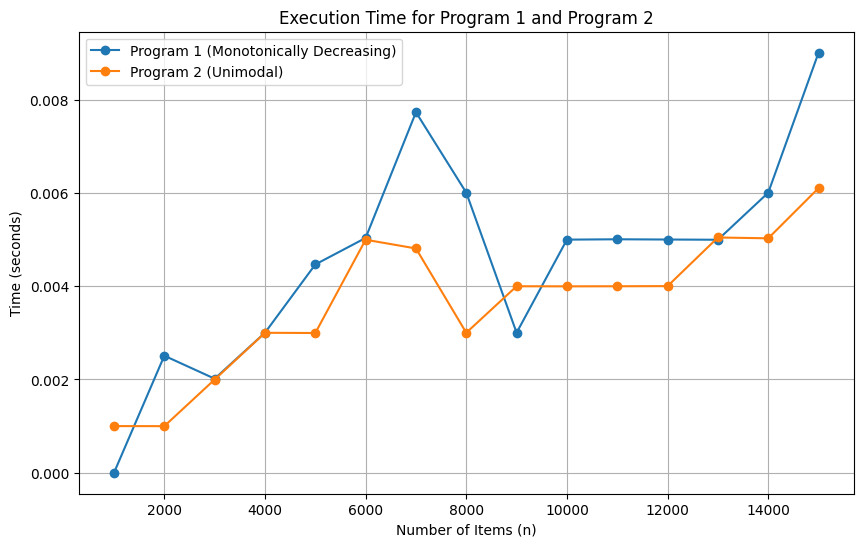

In [102]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple

# Function to generate monotonically decreasing heights and random widths
def generate_monotonic_decreasing(n: int, max_height: int, max_width: int) -> Tuple[List[int], List[int]]:
    """
    Generates a monotonically decreasing sequence of heights and corresponding widths.

    Parameters:
    n (int): Number of sculptures
    max_height (int): Maximum possible height
    max_width (int): Maximum possible width

    Returns:
    Tuple[List[int], List[int]]: A list of decreasing heights and corresponding widths.
    """
    # Generate heights with duplicates allowed
    heights = sorted([random.randint(1, max_height) for _ in range(n)], reverse=True)
    
    # Generate widths randomly between 1 and max_width
    widths = [random.randint(1, max_width) for _ in range(n)]
    
    return heights, widths


# Function to generate unimodal heights and random widths
def generate_unimodal(n: int, max_height: int, max_width: int) -> Tuple[List[int], List[int]]:
    """
    Generates a unimodal sequence of heights and corresponding widths.

    Parameters:
    n (int): Number of sculptures
    max_height (int): Maximum possible height
    max_width (int): Maximum possible width

    Returns:
    Tuple[List[int], List[int]]: A unimodal list of heights and a list of corresponding widths.
    """
    # Determine the peak index
    peak_index = random.randint(1, n - 2)  # making sure there are values before and after the peak

    # Generate two parts: decreasing part before the peak, and increasing part after the peak
    decreasing_part = sorted([random.randint(1, max_height) for _ in range(peak_index)], reverse=True)
    increasing_part = sorted([random.randint(1, max_height) for _ in range(n - peak_index)])

    heights = decreasing_part + increasing_part  # Concatenate both parts to get a unimodal sequence
    
    # Generate widths randomly between 1 and max_width
    widths = [random.randint(1, max_width) for _ in range(n)]
    
    return heights, widths


# Timing function to test Program1 (monotonically decreasing)
def time_algorithm_prog1(n, W, heights, widths):
    start_time = time.time()
    # Calling algorithm program1(n, W, heights, widths)
    program1(n, W, heights, widths)
    end_time = time.time()
    return end_time - start_time

# Timing function to test Program2 (unimodal)
def time_algorithm_prog2(n, W, heights, widths):
    start_time = time.time()
    # Calling program2(n, W, heights, widths)
    program2(n, W, heights, widths)
    end_time = time.time()
    return end_time - start_time

# Number of items to test
# test_sizes = [ 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

test_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]


# Max height and width for the sculptures
max_height = 50
max_width = 100
platform_width = 100

# Initialize lists to store timing results
times_prog1 = []
times_prog2 = []

for size in test_sizes:
    # Generate test case for ProblemS1 (monotonically decreasing)
    heights1, widths1 = generate_monotonic_decreasing(size, max_height, max_width)
    
    # Time the algorithm for ProblemS1
    time1 = time_algorithm_prog1(size, platform_width, heights1, widths1)
    times_prog1.append(time1)
    
    # Generate test case for ProblemS2 (unimodal)
    heights2, widths2 = generate_unimodal(size, max_height, max_width)
    
    # Time the algorithm for ProblemS2
    time2 = time_algorithm_prog2(size, platform_width, heights2, widths2)
    times_prog2.append(time2)

# Display timing results
print("Times for Program1 (monotonically decreasing):", times_prog1)
print("Times for Program2 (unimodal):", times_prog2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, times_prog1, label='Program 1 (Monotonically Decreasing)', marker='o')
plt.plot(test_sizes, times_prog2, label='Program 2 (Unimodal)', marker='o')
plt.xlabel('Number of Items (n)')
plt.ylabel('Time (seconds)')
plt.title('Execution Time for Program 1 and Program 2')
plt.legend()
plt.grid(True)
plt.show()


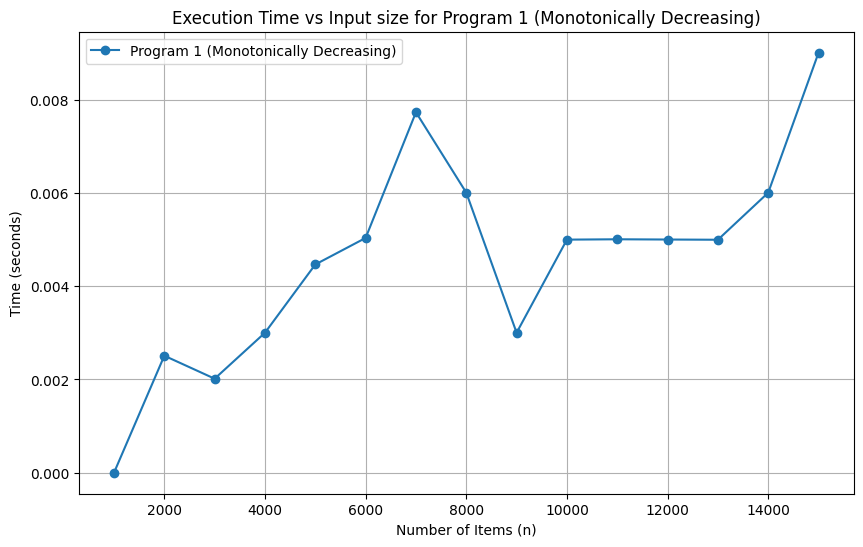

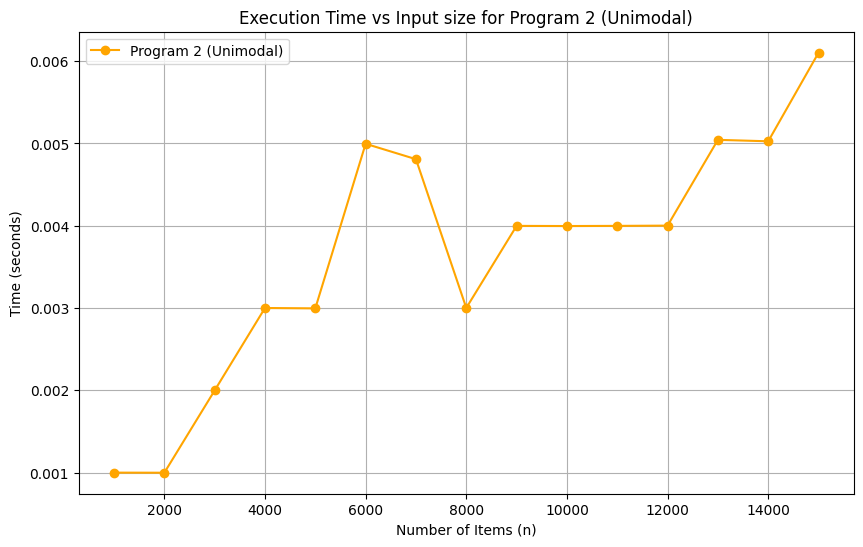

In [103]:
# Plotting results for Program 1 (Monotonically Decreasing)
plt.figure(figsize=(10, 6))  # Create a new figure for Program 1
plt.plot(test_sizes, times_prog1, label='Program 1 (Monotonically Decreasing)', marker='o')
plt.xlabel('Number of Items (n)')
plt.ylabel('Time (seconds)')
plt.title('Execution Time vs Input size for Program 1 (Monotonically Decreasing)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting results for Program 2 (Unimodal)
plt.figure(figsize=(10, 6))  # Create a new figure for Program 2
plt.plot(test_sizes, times_prog2, label='Program 2 (Unimodal)', marker='o', color = 'orange')
plt.xlabel('Number of Items (n)')
plt.ylabel('Time (seconds)')
plt.title('Execution Time vs Input size for Program 2 (Unimodal)')
plt.legend()
plt.grid(True)
plt.show()

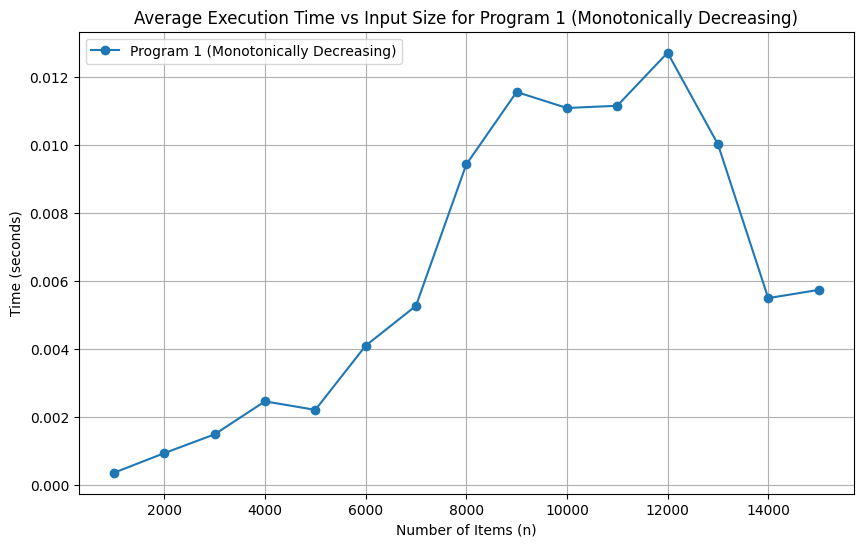

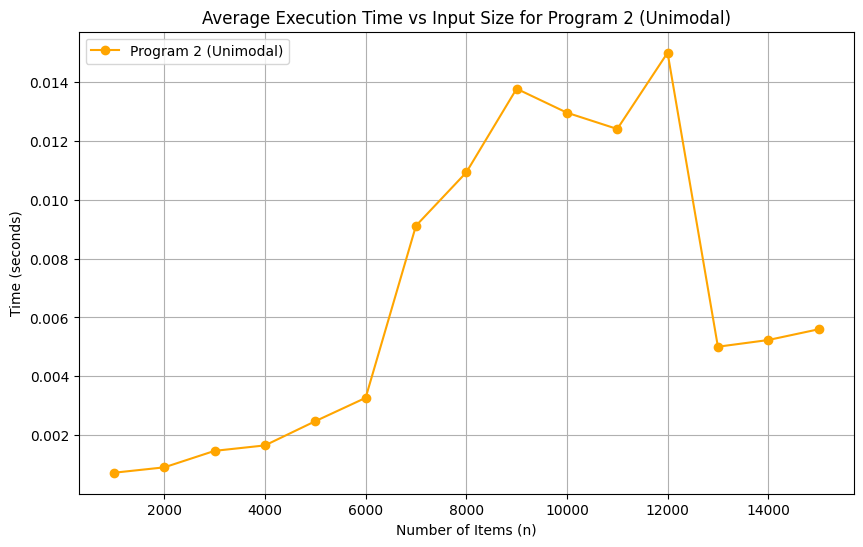

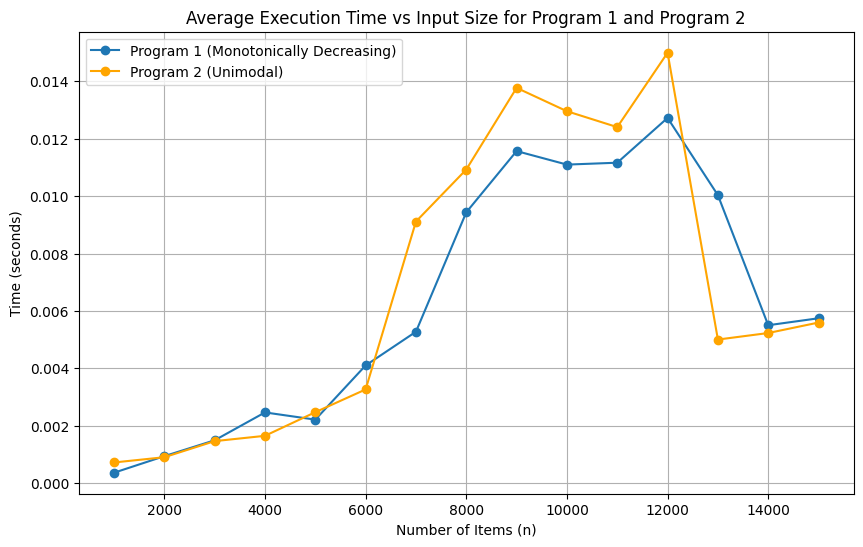

In [104]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple

# Function to generate monotonically decreasing heights and random widths
def generate_monotonic_decreasing(n: int, max_height: int, max_width: int) -> Tuple[List[int], List[int]]:
    heights = sorted([random.randint(1, max_height) for _ in range(n)], reverse=True)
    widths = [random.randint(1, max_width) for _ in range(n)]
    return heights, widths

# Function to generate unimodal heights and random widths
def generate_unimodal(n: int, max_height: int, max_width: int) -> Tuple[List[int], List[int]]:
    peak_index = random.randint(1, n - 2)  # Ensure there are values before and after the peak
    decreasing_part = sorted([random.randint(1, max_height) for _ in range(peak_index)], reverse=True)
    increasing_part = sorted([random.randint(1, max_height) for _ in range(n - peak_index)])
    heights = decreasing_part + increasing_part
    widths = [random.randint(1, max_width) for _ in range(n)]
    return heights, widths

# Timing function to test Program1 (monotonically decreasing)
def time_algorithm_prog1(n, W, heights, widths):
    start_time = time.time()
    program1(n, W, heights, widths)  
    end_time = time.time()
    return end_time - start_time

# Timing function to test Program2 (unimodal)
def time_algorithm_prog2(n, W, heights, widths):
    start_time = time.time()
    program2(n, W, heights, widths)  
    end_time = time.time()
    return end_time - start_time

# Function to run an algorithm multiple times and return the average time
def average_execution_time(algorithm, n, W, heights_func, widths_func, repetitions=100):
    total_time = 0
    for _ in range(repetitions):
        heights, widths = heights_func(n, max_height, max_width)
        total_time += algorithm(n, W, heights, widths)
    return total_time / repetitions  # Return the average time

# Parameters
test_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
max_height = 50
max_width = 100
platform_width = 100
repetitions = 100  # Number of times to repeat each test

# Initialize lists to store average timing results
avg_times_prog1 = []
avg_times_prog2 = []

# Collect average execution times for each test size
for size in test_sizes:
    # Average time for Program 1 (Monotonically Decreasing)
    avg_time1 = average_execution_time(time_algorithm_prog1, size, platform_width, generate_monotonic_decreasing, generate_monotonic_decreasing, repetitions)
    avg_times_prog1.append(avg_time1)
    
    # Average time for Program 2 (Unimodal)
    avg_time2 = average_execution_time(time_algorithm_prog2, size, platform_width, generate_unimodal, generate_unimodal, repetitions)
    avg_times_prog2.append(avg_time2)

# Plot results for Program 1 (Monotonically Decreasing)
plt.figure(figsize=(10, 6))  # Create a new figure for Program 1
plt.plot(test_sizes, avg_times_prog1, label='Program 1 (Monotonically Decreasing)', marker='o')
plt.xlabel('Number of Items (n)')
plt.ylabel('Time (seconds)')
plt.title('Average Execution Time vs Input Size for Program 1 (Monotonically Decreasing)')
plt.legend()
plt.grid(True)
plt.show()

# Plot results for Program 2 (Unimodal)
plt.figure(figsize=(10, 6))  # Create a new figure for Program 2
plt.plot(test_sizes, avg_times_prog2, label='Program 2 (Unimodal)', marker='o', color='orange')
plt.xlabel('Number of Items (n)')
plt.ylabel('Time (seconds)')
plt.title('Average Execution Time vs Input Size for Program 2 (Unimodal)')
plt.legend()
plt.grid(True)
plt.show()

# --- Combined Plot for Program 1 and Program 2 ---
plt.figure(figsize=(10, 6))  # Create a new figure for the combined plot
plt.plot(test_sizes, avg_times_prog1, label='Program 1 (Monotonically Decreasing)', marker='o')
plt.plot(test_sizes, avg_times_prog2, label='Program 2 (Unimodal)', marker='o', color='orange')
plt.xlabel('Number of Items (n)')
plt.ylabel('Time (seconds)')
plt.title('Average Execution Time vs Input Size for Program 1 and Program 2')
plt.legend()
plt.grid(True)
plt.show()